In [1]:
import numpy as np
import pandas as pd
from scipy.stats import laplace
import matplotlib.pyplot as plt
import random

The graph of the deviation from the true value after applying Laplace Mechanism

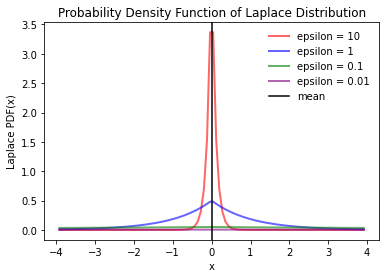

In [2]:
fig, ax = plt.subplots(1, 1)
color = {10 : 'r-', 1 : 'blue', 0.1 : 'green', 0.01 : 'purple'}
x = np.linspace(laplace.ppf(0.01),
                laplace.ppf(0.99), 100)
for epsilon in [10, 1, 0.1, 0.01]:
    ax.plot(x, laplace.pdf(x, scale = 1/epsilon), color[epsilon], lw=2, alpha=0.6, label = 'epsilon = ' + str(epsilon))
plt.axvline(x=0, label = 'mean', color = 'black')
ax.legend(loc='best', frameon=False)
plt.title("Probability Density Function of Laplace Distribution")
plt.xlabel("x")
plt.ylabel("Laplace PDF(x)")
plt.savefig("plots/laplacepdf.png", dpi = 500)
plt.show()

Standard deviation of Laplace Distribution for each alpha

In [3]:
for epsilon in [10, 1, 0.1, 0.01]:
    stdev = laplace.std(scale = 1/epsilon)
    print("Standard Deviation for epsilon " + str(epsilon) + ": " + str(stdev))

Standard Deviation for epsilon 10: 0.14142135623730953
Standard Deviation for epsilon 1: 1.4142135623730951
Standard Deviation for epsilon 0.1: 14.142135623730951
Standard Deviation for epsilon 0.01: 141.4213562373095


Differentially private average age with different bounds

/var/folders/79/23l27dcx34n5r1g859ng7q4h0000gn/T/ipykernel_44138/2673646860.py:37: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  clb = fig.colorbar(im)


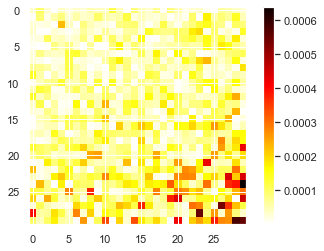

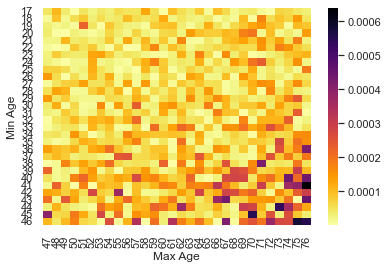

In [90]:
def sensitivity(list):
    ave = list.mean()
    return max(abs(ave - list.max()), abs(ave - list.min())) / (len(list) - 1)


df_income = pd.read_csv('income.csv')
df_age = df_income['age']
epsilon = 0.1
xtick = range(47, 77)
ytick = range(17, 47)

data = []
#min age = y axis
for i in range(30):
    row = []
    minage = i + 17
    #max age = x axis
    for j in range(30):
        maxage = j + 47
        #new array with the boundary
        newarr = df_age[df_age >= minage]
        newarr = newarr[newarr <= maxage]
        #calculate the sensitivity within the boundary
        sens = sensitivity(newarr)
        #average age within the boundary, true mean
        averageage = newarr.mean()
        lap = laplace.rvs(scale = sens/epsilon, size = len(newarr))
        #calculate the average laplace corrected age, differentially private age
        laplaceage = averageage + lap.mean()
        #calculate the difference between the true mean
        #and the differentially private age
        row.append(abs(laplaceage - averageage))
    data.append(row)

fig, ax = plt.subplots()
im = ax.imshow(data, cmap='hot_r', interpolation='nearest')
clb = fig.colorbar(im)
plt.show()


import seaborn as sns

sns.set()
ax = sns.heatmap(data, linewidth=0, xticklabels=xtick, yticklabels=ytick, cmap = 'inferno_r')
plt.xlabel("Max Age")
plt.ylabel("Min Age")
plt.show()


Histogram of ages

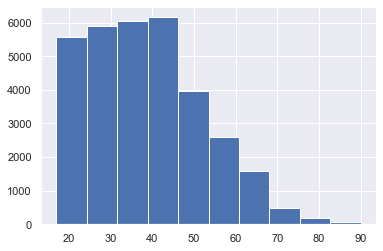

In [91]:
plt.hist(df_age)
plt.show()